## hammurabiX tutorial 01
(we recommend users to run tutorials on docker image)

### hammurabiX with given field models

This tutorial describes the basic usage of the python wrapper which depends on an XML parameter file. 

In [1]:
import matplotlib
import numpy as np
import healpy as hp
import sys
sys.path.append('../hampyx/')
import hampyx as hpx

matplotlib.use('Agg')
%matplotlib inline

### hampyx, the hammurabiX python wrapper

The Hampyx init function:

```
def __init__(self,
             xml_path='./params.xml',
             exe_path=None)
```

The path to the executable is searched automatically through the system environment.

Users can store different sets of `hammuarbiX` parameters in different `XML` files.

working directory is set as the same directory as this file, it relies on subprocess to fork `C++` routine and passing data through disk, and by doing so, it is not fast.

Notice that `hammurabiX` uses `XML` input parameter file, which may look like:

```
<root>
    ...
    <key1 tag1='content1'>
        ...
        <key2 tag21='content21' tag22='content22'/>
        ...
    </key1>
    ...
</root>
```
We highly recommend users to read the template_params.xml first, where sufficient captions have been provided.

methods/functions:

- Import class

```
In []: import hampyx as hpx
```

- Initialize instance/object

```
In []: object = hpx.Hampyx (exe_path, xml_path)
```

- Modify parameter value from base xml file to temp `XML` file

```
In []: object.mod_par (keychain=['key1','key2',...], attrib={'tag':'content'})
```

- Add new parameter with or without attributes.

```
In []: object.add_par (keychain=['key1','key2',...], subkey='keyfinal', attrib={'tag':'content'})
```

The new parameter subkey, will be added at the path defined by keychain.

- Delete parameter

```
In []: object.del_par (keychain=['key1','key2',...],opt='')
```

If additional argument opt='all', then all matching parameters will be deleted.

The strings 'key1', 'key2', etc represent the path to the desired parameter, going through the `XML` file.

The "tag" is the label for the parameter: eg. "Value" or "cue" or "type".

The "content" is the content under the tag: eg. the string for the tag "filename"

- Look through the parameter tree in python

```
In []: object.print_par(keychain=['key1','key2',...])
```

This will return the current value of the parameter in the `XML` associated with the path "key1/key2/.../keyfinal/".

- Run the executable

```
In []: object(verbose=True/False)
```

If additional verbose=True (by default is False) hampyx_run.log and hampyx_err.log will be dumped to disk
notice that dumping logs is not thread safe, use quiet mode in threading.

After this main routine, object.sim_map will be filled with simulation outputs from hammurabiX
the structure of object.sim_map contains arrays under entries:

(we give up nested dict structure for the convenience of Bayesian analysis)

```
object.sim_map[('sync',str(freq),str(Nside),'I')] # synchrotron intensity map at 'frequency' 
object.sim_map[('sync',str(freq),str(Nside),'Q')] # synchrotron Q map at 'frequency' 
object.sim_map[('sync',str(freq),str(Nside),'U')] # synchrotron U map at 'frequency' 
object.sim_map[('sync',str(freq),str(Nside),'PI')] # synchrotron pol. intensity at 'frequency' 
object.sim_map[('sync',str(freq),str(Nside),'PA')] # synchrotron pol. angle at 'frequency' (IAU convention)
object.sim_map[('fd','nan',str(Nside),'nan')] # Faraday depth map
object.sim_map[('dm','nan',str(Nside),'nan')] # dispersion measure map
```

#### In the following we will present how to use above functions

#### initialize

In [2]:
xmlpath = '../templates/params_template.xml'
sim = hpx.Hampyx(xml_path=xmlpath)

# print executable path
print (sim.exe_path)
# print parameter file path
print (sim.xml_path)
# print root->observable
sim.print_par(['observable'])

/usr/local/hammurabi/bin/hamx
/home/lab/hamx/templates/params_template.xml
observable {}
|-->  dm {'cue': '1', 'filename': 'dm.fits', 'nside': '8'}
|-->  faraday {'cue': '1', 'filename': 'fd.fits', 'nside': '64'}
|-->  sync {'cue': '1', 'freq': '30', 'filename': 'sync_30.fits', 'nside': '16'}
|-->  sync {'cue': '1', 'freq': '1.4', 'filename': 'sync_1.4.fits', 'nside': '32'}


- once the `XML` parameter file is read in, the `XML` tree is deep copied and so the following modifications does not affect the external file, unless explicit write the tree to the disk

#### use `del_par` to remove dust emission outputs

In [3]:
sim.del_par(['observable','sync'],'all')
sim.print_par(['observable'])

observable {}
|-->  dm {'cue': '1', 'filename': 'dm.fits', 'nside': '8'}
|-->  faraday {'cue': '1', 'filename': 'fd.fits', 'nside': '64'}


#### use `mod_par` to change synchrotron emission output resolution

In [4]:
sim.mod_par(['observable','faraday'],{'nside':'2'})
sim.print_par(['observable'])

observable {}
|-->  dm {'cue': '1', 'filename': 'dm.fits', 'nside': '8'}
|-->  faraday {'cue': '1', 'filename': 'fd.fits', 'nside': '2'}


#### use `add_par` to add another synchrotron emission output

In [5]:
sim.add_par(['observable'],'sync',{'cue':'1','freq':'10','filename':'sync_10.fits','nside':'8'})
sim.print_par(['observable'])

observable {}
|-->  dm {'cue': '1', 'filename': 'dm.fits', 'nside': '8'}
|-->  faraday {'cue': '1', 'filename': 'fd.fits', 'nside': '2'}
|-->  sync {'cue': '1', 'freq': '10', 'filename': 'sync_10.fits', 'nside': '8'}


- upon adding an existed key with existed attributes, a ValueError will be raised

#### check field i/o settings

In [6]:
sim.print_par(['fieldio'])

fieldio {}
|-->  breg {'read': '0', 'write': '0', 'filename': 'breg.bin'}
|-->  brnd {'read': '0', 'write': '0', 'filename': 'brnd.bin'}
|-->  tereg {'read': '0', 'write': '0', 'filename': 'tereg.bin'}
|-->  ternd {'read': '0', 'write': '0', 'filename': 'ternd.bin'}
|-->  cre {'read': '0', 'write': '0', 'filename': 'cre.bin'}


#### check grid settings

In [7]:
sim.print_par(['grid'])

grid {}
|-->  observer {}
|-->  box_breg {}
|-->  box_brnd {}
|-->  box_tereg {}
|-->  box_ternd {}
|-->  box_cre {}
|-->  shell {}


- grid->observer hosts the galactic-centric location of the observer (in kpc unit)

In [8]:
sim.print_par(['grid','observer'])

observer {}
|-->  x {'value': '-8.3'}
|-->  y {'value': '0'}
|-->  z {'value': '0.006'}


- shell hosts the LoS integral settings

In [9]:
sim.print_par(['grid','shell'])
print()
sim.print_par(['grid','shell','layer'])
print()
sim.print_par(['grid','shell','layer','auto'])
print()
sim.print_par(['grid','shell','layer','manual'])

shell {}
|-->  layer {'type': 'auto'}
|-->  oc_r_min {'value': '0.0'}
|-->  oc_r_max {'value': '30.0'}
|-->  gc_r_min {'value': '0.0'}
|-->  gc_r_max {'value': '20.0'}
|-->  gc_z_min {'value': '-10.0'}
|-->  gc_z_max {'value': '10.0'}
|-->  oc_r_res {'value': '0.01'}

layer {'type': 'auto'}
|-->  auto {}
|-->  manual {}

auto {}
|-->  shell_num {'value': '1'}
|-->  nside_sim {'value': '32'}

manual {}
|-->  cut {'value': '0.5'}
|-->  nside_sim {'value': '32'}
|-->  nside_sim {'value': '64'}


#### check magnetic field settings

In [10]:
sim.print_par(['magneticfield'])

magneticfield {}
|-->  regular {'cue': '1', 'type': 'unif'}
|-->  random {'cue': '0', 'type': 'local', 'seed': '0'}


#### check thermal electron field settings

In [11]:
sim.print_par(['thermalelectron'])

thermalelectron {}
|-->  regular {'cue': '1', 'type': 'unif'}
|-->  random {'cue': '0', 'type': 'global', 'seed': '0'}


#### check cosmic ray electron field settings

In [12]:
sim.print_par(['cre'])

cre {'cue': '1', 'type': 'unif'}
|-->  analytic {}
|-->  unif {}


#### users are recommended to check all parameters to make sure they are set as expected, then we can start to run the simulation routine

- the optional input argument verbose=True/False determines whether the log of hammurabiX execution will be printed

In [13]:
sim(True)

- get the output entries

In [14]:
for key in sim.sim_map.keys():
    print (key)

('dm', 'nan', '8', 'nan')
('fd', 'nan', '2', 'nan')
('sync', '10', '8', 'I')
('sync', '10', '8', 'Q')
('sync', '10', '8', 'U')
('sync', '10', '8', 'PI')
('sync', '10', '8', 'PA')


- illustrate simulated map behind one entry

/usr/local/lib/python3.6/dist-packages/healpy/projaxes.py:988: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):
/usr/local/lib/python3.6/dist-packages/healpy/projaxes.py:958: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if matplotlib.cbook.iterable(value):


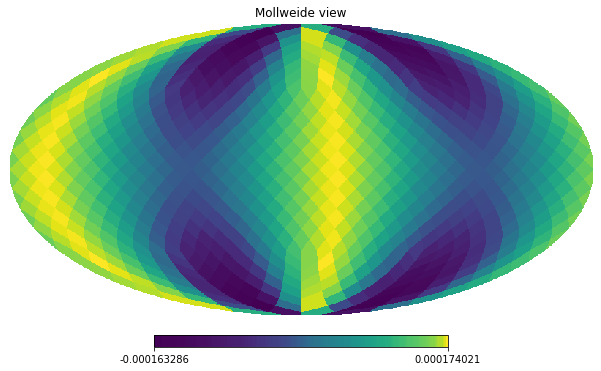

In [15]:
out_sync_Q = sim.sim_map[('sync', '10', '8', 'Q')]
hp.mollview(out_sync_Q,norm='hist')

end